<a href="https://colab.research.google.com/github/Metsashka/-3-/blob/master/4_%D0%9B%D0%B0%D0%B1_%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%9C%D0%B5%D1%82%D0%BB%D0%B8%D1%86%D0%BA%D0%B8%D0%B9_%D0%90_%D0%97_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MNIST библиотека образцов поставляется вместе с Keras

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

# подготовка правильного формата выходных данных с помощью функции categorical

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

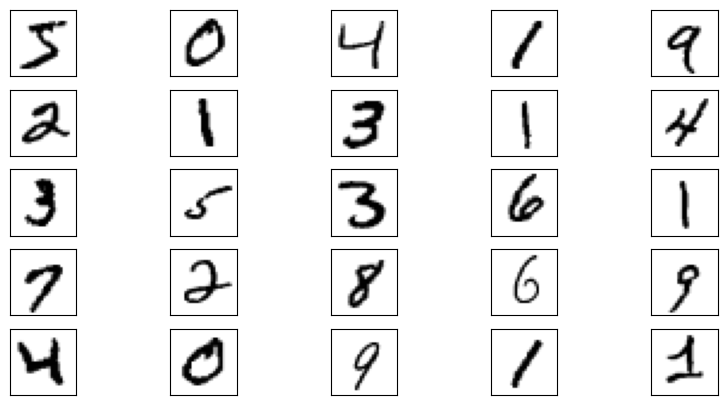

In [ ]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()


In [ ]:
# Итоговую модель в Keras
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(75, activation='relu'), # Скрытый слой
    Dense(75, activation='relu'),
    Dense(10, activation='softmax') # Выходной слой
])


print(model.summary())     # вывод структуры НС в консоль


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_35 (Flatten)        (None, 784)               0         
                                                                 
 dense_108 (Dense)           (None, 75)                58875     
                                                                 
 dense_109 (Dense)           (None, 75)                5700      
                                                                 
 dense_110 (Dense)           (None, 10)                760       
                                                                 
Total params: 65335 (255.21 KB)
Trainable params: 65335 (255.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
  # Здесь каждое значение тензоров x_train и x_test будет делиться на максимальное число 255, которое они могут принимать. На выходе получим вещественные величины от 0 до 1
  x_train = x_train / 255
  x_test = x_test / 255

  y_train_cat = keras.utils.to_categorical(y_train, 10)
  y_test_cat = keras.utils.to_categorical(y_test, 10)

  model.compile(optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])


In [ ]:
# 	batch_size = 32 – это размер батча (32 картинки),validation_split = 0,2 – разбиение обучающей выборки на собственно обучающую и проверочную
model.fit(x_train, y_train_cat, batch_size=32, epochs=10 , validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.0247 - accuracy: 0.6813 - val_loss: 0.5868 - val_accuracy: 0.8316
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5003 - accuracy: 0.8519 - val_loss: 0.4111 - val_accuracy: 0.8824
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4018 - accuracy: 0.8809 - val_loss: 0.3555 - val_accuracy: 0.8992
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3562 - accuracy: 0.8964 - val_loss: 0.3212 - val_accuracy: 0.9071
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3244 - accuracy: 0.9050 - val_loss: 0.2993 - val_accuracy: 0.9128
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2998 - accuracy: 0.9123 - val_loss: 0.2808 - val_accuracy: 0.9191
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2783 - accuracy: 0.9193 - val_loss: 0.2559 - val_accuracy:

In [ ]:
# проверку работы сети на тестовом множестве
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.2252 - accuracy: 0.9355


[0.22523142397403717, 0.9355000257492065]

In [ ]:
from keras.src.backend import random
n= random.randint(0, 9)
x = np.expand_dims(x_test[n], axis=0)

# одно изображение подавать нельзя, так # как мы получим двумерную матрицу, которую нельзя подавать на вход модели
# model.predict,поэтому мы мы должны представить в виде трехмерного тензора
# x_test[n] и добавляем и одну ось axis=0

res = model.predict(x)
print( res )


1/1 [==============================] - 0s 78ms/step
[[4.7096992e-06 1.3835245e-06 2.9862504e-06 6.6916305e-06 9.6364403e-01
  1.6140085e-02 6.4384301e-05 1.6069581e-04 5.6289211e-03 1.4346202e-02]]


In [ ]:
print("распознанная цифра: ", np.argmax(res) )
print(f"распознанная цифра: {np.argmax(res)}" )



распознанная цифра:  4
распознанная цифра: 4


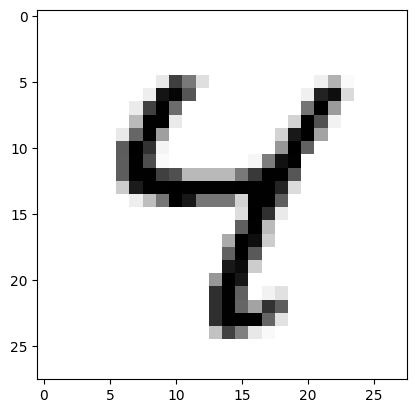

In [ ]:
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()


In [ ]:
# Пропустим через НС всю тестовую выборку и векторы выходных значений преобразуем в числа от 0 до 9
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])


313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
# сформируем маску, которая будет содержать True для верных вариантов и False – для неверных
mask = pred == y_test
print(mask[:20])

x_false = x_test[~mask]
y_false = pred[~mask]

print(x_false.shape)


[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True]
(645, 28, 28)


Значение сети: 7


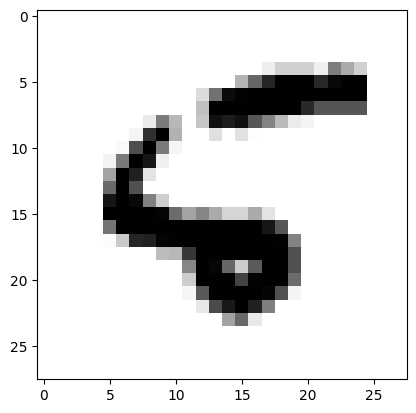

Значение сети: 2


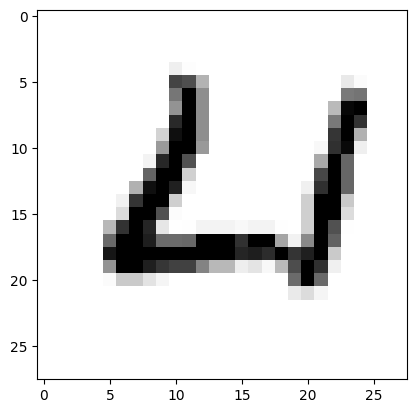

Значение сети: 1


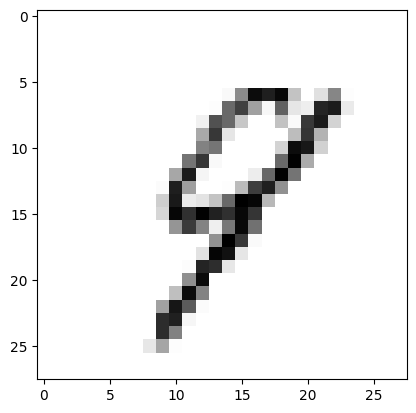

Значение сети: 0


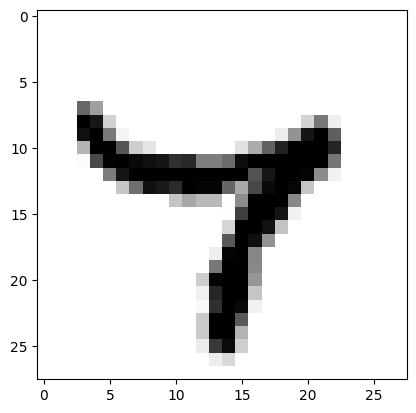

Значение сети: 4


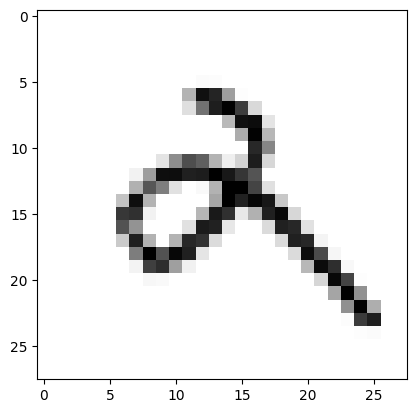

Значение сети: 1


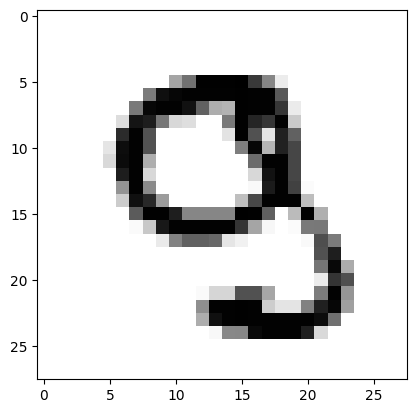

Значение сети: 4


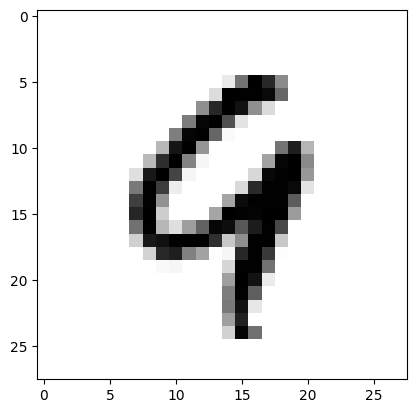

Значение сети: 9


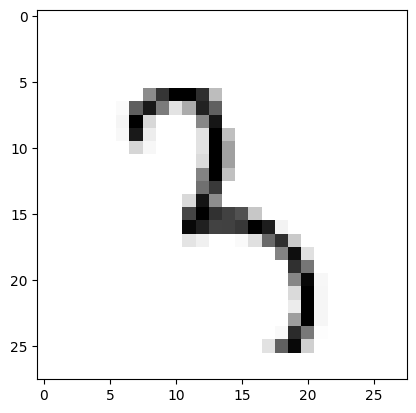

Значение сети: 5


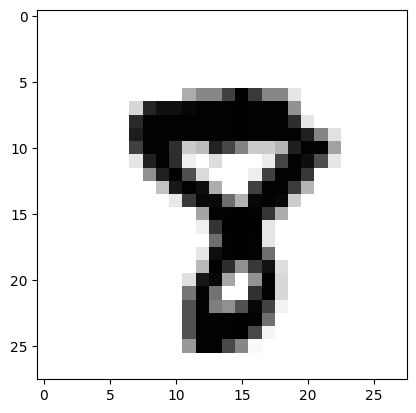

Значение сети: 9


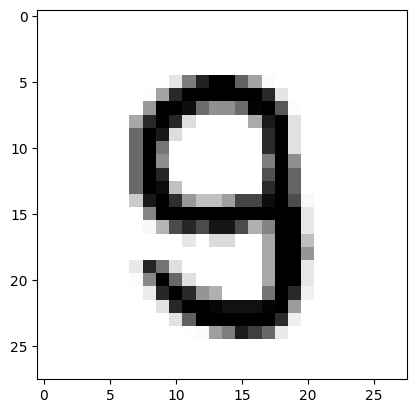

In [ ]:
# выведем первые 10 из них на экран
for i in range(10):
  print("Значение сети: "+str(y_test[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()


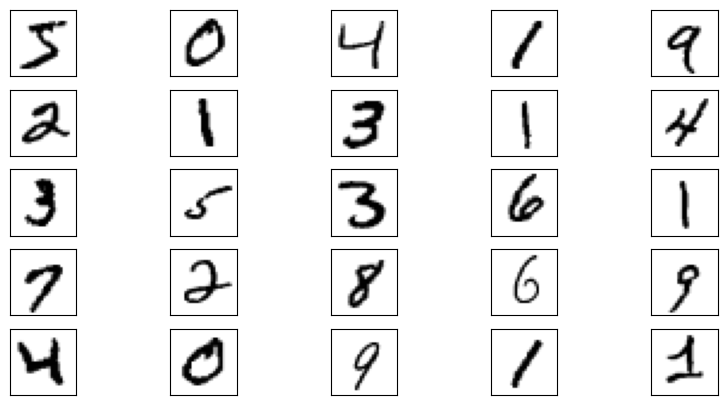

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 784)               0         
                                                                 
 dense_84 (Dense)            (None, 75)                58875     
                                                                 
 dense_85 (Dense)            (None, 75)                5700      
                                                                 
 dropout_5 (Dropout)         (None, 75)                0         
                                                                 
 dense_86 (Dense)            (None, 10)                760       
                                                                 
Total params: 65335 (255.21 KB)
Trainable params: 65335 (255.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5


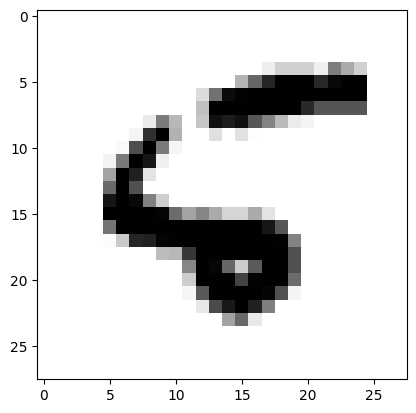

313/313 [==============================] - 1s 3ms/step
(10000,)
[7 8 1 0 6 1 7 7 7 7 4 6 7 4 1 2 6 7 8 7]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[ True False  True  True False  True False False False False False  True
 False False  True False False  True False False]
(6012, 28, 28)
Значение сети: 7


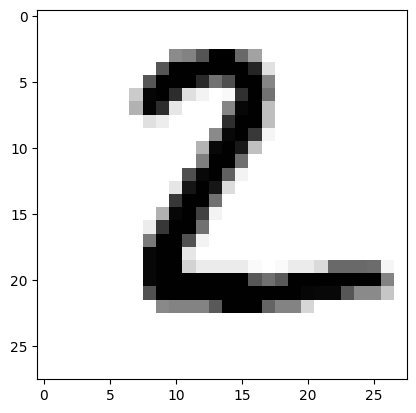

Значение сети: 2


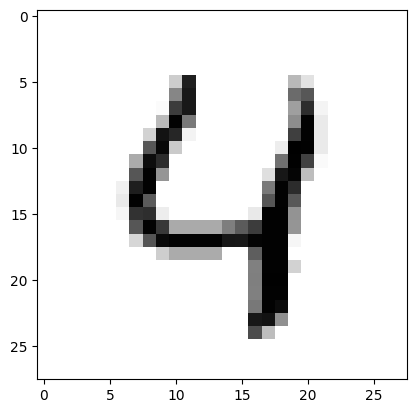

Значение сети: 1


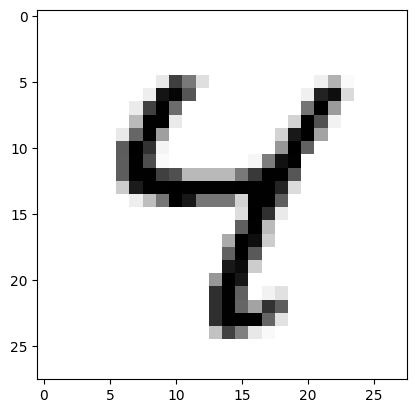

Значение сети: 0


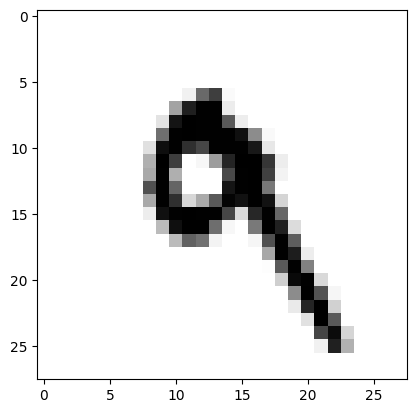

Значение сети: 4


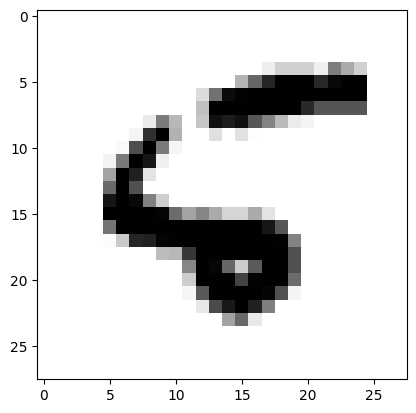

Значение сети: 1


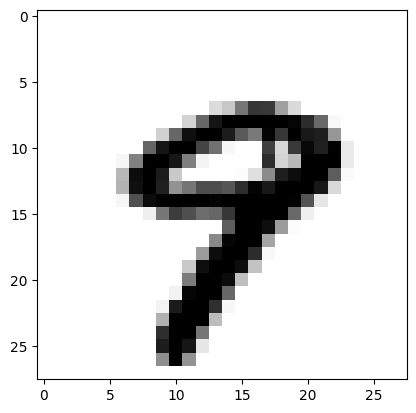

Значение сети: 4


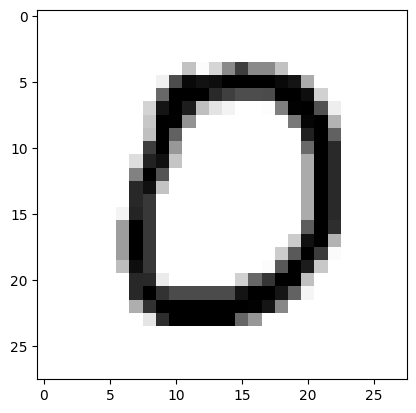

Значение сети: 9


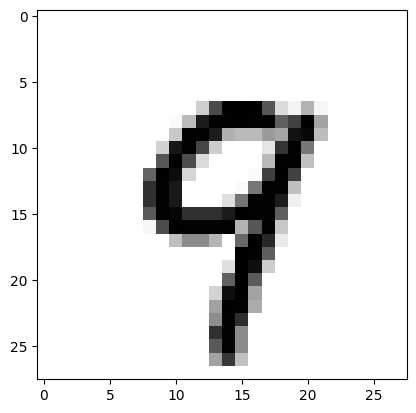

Значение сети: 5


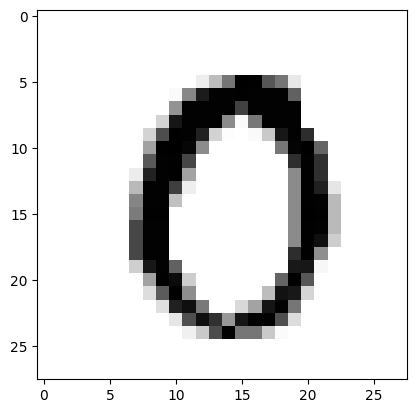

Значение сети: 9


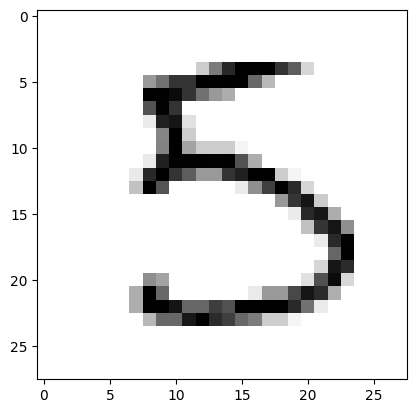

In [38]:
# MNIST библиотека образцов поставляется вместе с Keras

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense
from keras.optimizers import Adam, Optimizer
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

# подготовка правильного формата выходных данных с помощью функции categorical

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

# Итоговую модель в Keras
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(75, activation='relu'), # Скрытый слой
    Dense(75, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax') # Выходной слой
])


print(model.summary())     # вывод структуры НС в консоль

# Здесь каждое значение тензоров x_train и x_test будет делиться на максимальное число 255, которое они могут принимать. На выходе получим вещественные величины от 0 до 1


y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

#model.compile(optimizer='adam',
#loss='categorical_crossentropy',
#metrics=['accuracy'])

#myAdam = keras.optimizers.Adam(learning_rate=0.0001)
#model.compile(optimizer=myAdam,
#             loss='categorical_crossentropy',
#             metrics=['accuracy'])

myOpt = keras.optimizers.SGD(learning_rate=0.0001)
model.compile(optimizer=myOpt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# 	batch_size = 32 – это размер батча (32 картинки),validation_split = 0,2 – разбиение обучающей выборки на собственно обучающую и проверочную
#model.fit(x_train, y_train_cat, batch_size=32, epochs=5 , validation_split=0.2)

size_val = 10000  # размер выборки валидации

x_val_split = x_train[:size_val]  # выделяем первые наблюдения из обучающей выборки

y_val_split = y_train_cat[:size_val] # в выборку валидации

x_train_split = x_train[size_val:] # выделяем последующие наблюдения для обучающей выборки

y_train_split = y_train_cat[size_val:]



x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train_cat, test_size=0.2)

model.fit(x_train_split, y_train_split, batch_size=32, epochs=5,
validation_data=(x_val_split, y_val_split))

# проверку работы сети на тестовом множестве
model.evaluate(x_test, y_test_cat)

from keras.src.backend import random
n= random.randint(0, 9)
x = np.expand_dims(x_test[n], axis=0)

# одно изображение подавать нельзя, так # как мы получим двумерную матрицу, которую нельзя подавать на вход модели
# model.predict,поэтому мы мы должны представить в виде трехмерного тензора
# x_test[n] и добавляем и одну ось axis=0

res = model.predict(x)
print( res )

print("распознанная цифра: ", np.argmax(res) )
print(f"распознанная цифра: {np.argmax(res)}" )
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

# Пропустим через НС всю тестовую выборку и векторы выходных значений преобразуем в числа от 0 до 9
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

# сформируем маску, которая будет содержать True для верных вариантов и False – для неверных
mask = pred == y_test
print(mask[:20])

x_false = x_test[~mask]
y_false = pred[~mask]

print(x_false.shape)

# выведем первые 10 из них на экран
for i in range(10):
  print("Значение сети: "+str(y_test[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense
from keras.datasets import mnist
from keras.optimizers import Adam, Optimizer
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

# подготовка правильного формата выходных данных с помощью функции categorical
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

# определение классов myAdam и myOpt
class myAdam(Adam):
    def __init__(self, learning_rate=0.001, **kwargs):
        super().__init__(**kwargs)
        self.learning_rate = learning_rate

class myOpt(Optimizer):
    def __init__(self, learning_rate=0.001, **kwargs):
        super().__init__(**kwargs)
        self.learning_rate = learning_rate

# Создание модели в Keras
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(75, activation='relu'), # Скрытый слой
    Dense(75, activation='relu'),
    Dense(10, activation='softmax') # Выходной слой
])

# Использование классов myAdam и myOpt в model.compile
my_adam = myAdam(learning_rate=0.1)  # Измените шаг сходимости здесь
my_opt = myOpt(learning_rate=0.1)  # Измените шаг сходимости здесь
model.compile(optimizer=my_adam, loss='categorical_crossentropy', metrics=['accuracy'])

# обучение сети
model.fit(x_train, y_train_cat, batch_size=32, epochs=10 , validation_split=0.2)

# проверка работы сети на тестовом множестве
model.evaluate(x_test, y_test_cat)

from keras.src.backend import random
n= random.randint(0, 9)
x = np.expand_dims(x_test[n], axis=0)

# одно изображение подавать нельзя, так # как мы получим двумерную матрицу, которую нельзя подавать на вход модели
# model.predict,поэтому мы мы должны представить в виде трехмерного тензора
# x_test[n] и добавляем и одну ось axis=0

res = model.predict(x)
print( res )

print("распознанная цифра: ", np.argmax(res) )
print(f"распознанная цифра: {np.argmax(res)}" )
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

# Пропустим через НС всю тестовую выборку и векторы выходных значений преобразуем в числа от 0 до 9
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

# сформируем маску, которая будет содержать True для верных вариантов и False – для неверных
mask = pred == y_test
print(mask[:20])

x_false = x_test[~mask]
y_false = pred[~mask]

print(x_false.shape)

# выведем первые 10 из них на экран
for i in range(10):
  print("Значение сети: "+str(y_test[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()

TypeError: ignored